In [48]:
import numpy as np
from analysis_functions import *

data_dir = "../../data/"

sufix = 10
sample = 60  #0 - 9999
fs = 25e6  #sample_frequency
dt = 1/25e6 #period

samples = load_samples(data_dir,f"{sufix:03d}")

# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]


print('Done')

Done


Actual noise variance:    0.1000
Estimated noise variance: 0.0967


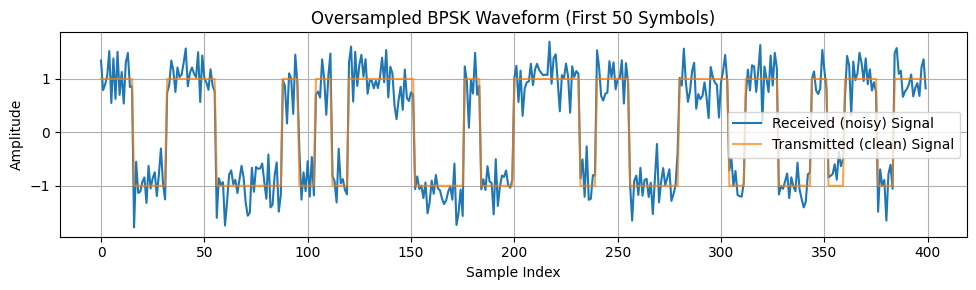

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fundamental Approach for Computing Noise Variance in an Oversampled BPSK System

# 1. System Parameters
N_symbols = 1000       # Number of BPSK symbols
M = 8                  # Oversampling factor (samples per symbol)
EbNo_dB = 10           # Desired Eb/N0 in dB

# 2. Generate random BPSK symbols (+1 or -1)
bits = np.random.randint(0, 2, N_symbols)
symbols = 2*bits - 1

# 3. Oversample and pulse-shape (simple rectangular pulse)
s_tx = np.repeat(symbols, M)

# 4. Compute noise parameters
signal_power = np.mean(s_tx**2)                  # Average signal power
SNR_linear = 10**(EbNo_dB / 10)                  # Convert Eb/N0 to linear SNR
noise_variance = signal_power / SNR_linear       # Variance of AWGN
noise_sigma = np.sqrt(noise_variance)            # Standard deviation

# 5. Add AWGN to the transmitted signal
noise = noise_sigma * np.random.randn(len(s_tx))
y = s_tx + noise

# 6. Fundamental Noise Estimation
#    Assuming perfect knowledge of transmitted signal (s_tx):
noise_est = y - s_tx
estimated_variance = np.mean(noise_est**2)

# 7. Print results
print(f"Actual noise variance:    {noise_variance:.4f}")
print(f"Estimated noise variance: {estimated_variance:.4f}")

# 8. Visualize a segment of the signal
plt.figure(figsize=(10, 3))
t = np.arange(50 * M)
plt.plot(t, y[:50*M], label='Received (noisy) Signal')
plt.plot(t, s_tx[:50*M], label='Transmitted (clean) Signal', alpha=0.7)
plt.title('Oversampled BPSK Waveform (First 50 Symbols)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2025-02-20 15:38:03.942225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 15:38:03.946493: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 15:38:03.958297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-20 15:38:03.980534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-20 15:38:03.987641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 15:38:05.301413: W tensorflow/compiler/tf2tensorrt/utils/p

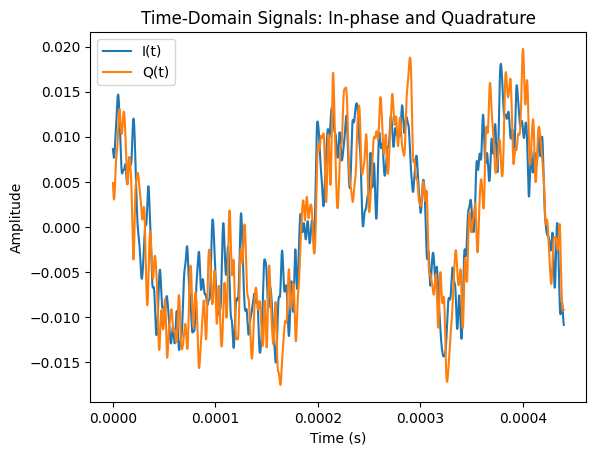

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from analysis_functions import *

data_dir = "../../data/"

sufix = 10
sample = 60  #0 - 9999
samples = load_samples(data_dir,f"{sufix:03d}")
# =============================================================================
# 1. Signal and System Parameters
# =============================================================================


# Obtain I[0] and Q[1] signals
iq_signal = samples[sample,:,]
i_signal = samples[sample,:,0]
q_signal = samples[sample,:,1]

I = i_signal
Q = q_signal

# Sampling frequency and duration
fs = 25e6  #sample_frequency
N = 11000  # Total number of samples
t = np.arange(N) / fs

# =============================================================================
# 2. Generate the Complex Baseband (IQ) Signal
# =============================================================================

x_IQ = I + 1j * Q

short_samples = slice(0, len(t))  # show first 200 samples for clarity
plt.plot(t[short_samples], I[short_samples], label='I(t)')
plt.plot(t[short_samples], Q[short_samples], label='Q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signals: In-phase and Quadrature')
plt.legend()

12000
Bit pattern length: 12
Samples per symbol:  1000
Total samples:       12000


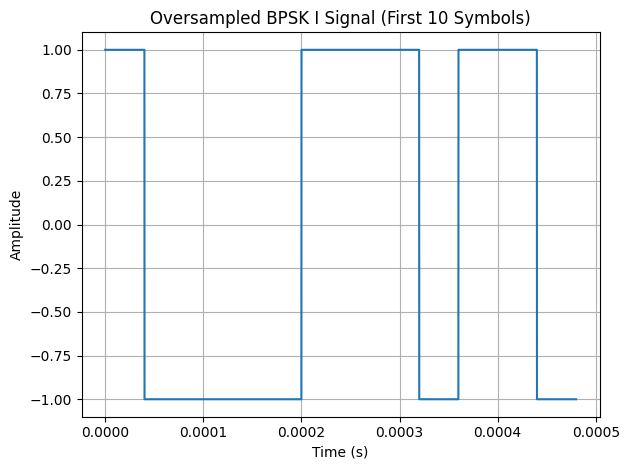

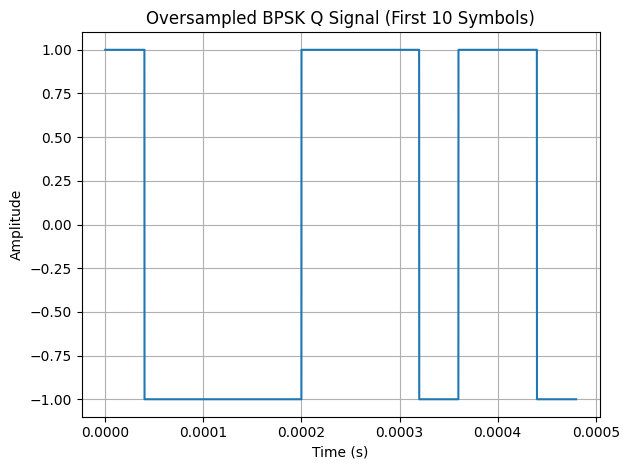

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
bit_str = "1100001111001100"       # Given bit patterns for I and Q
bit_str = "100001110110"       # Given bit patterns for I and Q
fs = 25e6                          # Sample frequency (Hz)
symbol_rate = 25e3                 # Symbol rate (symbols per second)
M = int(fs / symbol_rate)         # Oversampling factor

# --- Map bits to BPSK symbols (+1/-1) ---
bits = np.array([int(b) for b in bit_str])
symbols = 2*bits - 1

# --- Create I and Q signals (identical patterns in this case) ---
i_signal = np.repeat(symbols, M)
q_signal = np.repeat(symbols, M)

# --- Time vector ---
t = np.arange(len(i_signal)) / fs
print(len(t))
# --- Display basic info ---
print(f"Bit pattern length: {len(bit_str)}")
print(f"Samples per symbol:  {M}")
print(f"Total samples:       {len(i_signal)}")

# --- Plot first 10 symbols of I and Q ---
num_symbols_to_plot = 20
num_samples = num_symbols_to_plot * M

plt.figure()
plt.plot(t, i_signal)
plt.title("Oversampled BPSK I Signal (First 10 Symbols)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(t, q_signal)
plt.title("Oversampled BPSK Q Signal (First 10 Symbols)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()




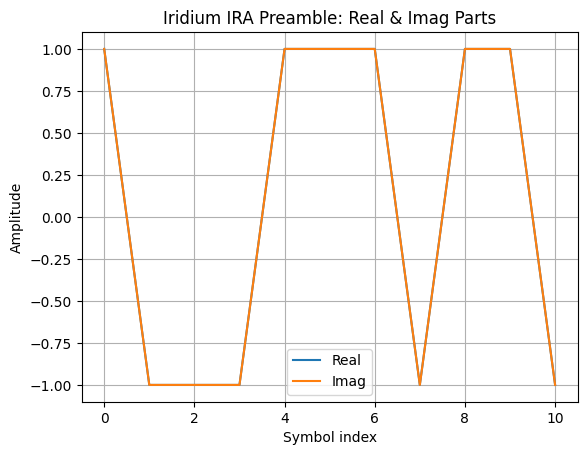

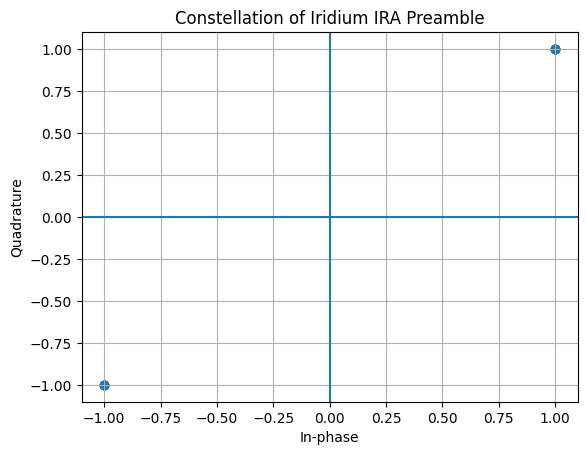

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def iridium_ira_preamble():
    """
    Generate the 12‑symbol BPSK preamble (Unique Word) used in Iridium IRA messages.
    """
    s1 = -1 - 1j        # symbol “1”
    s0 = -s1            # symbol “0” → +1 + 1j
    bits = [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    uw = np.array([s0 if b == 0 else s1 for b in bits], dtype=np.complex64)
    return uw

# Generate preamble
preamble = iridium_ira_preamble()

# Plot real and imaginary parts vs symbol index
plt.figure()
plt.plot(np.real(preamble), label='Real')
plt.plot(np.imag(preamble), label='Imag')
plt.xlabel('Symbol index')
plt.ylabel('Amplitude')
plt.title('Iridium IRA Preamble: Real & Imag Parts')
plt.legend()
plt.grid(True)
plt.show()

# Plot constellation diagram
plt.figure()
plt.scatter(np.real(preamble), np.imag(preamble))
plt.xlabel('In-phase')
plt.ylabel('Quadrature')
plt.title('Constellation of Iridium IRA Preamble')
plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.show()

fs = 25.0 MHz, samples per symbol = 1000
Total samples in preamble: 11000


ValueError: x and y must have same first dimension, but have shapes (11000,) and (11,)

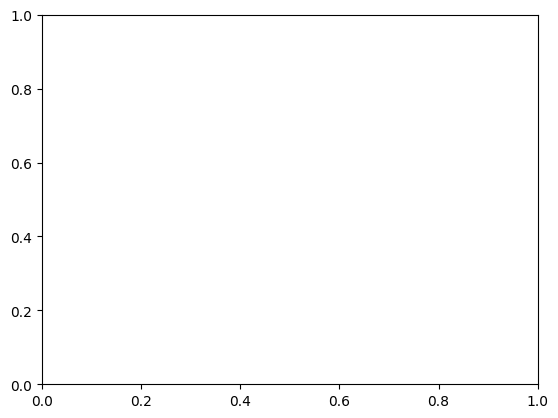

In [4]:
import numpy as np

# symbol rate and oversampling
symbol_rate = 25e3       # 25 ksps
oversampling = 1000      # samples per symbol
fs = symbol_rate * oversampling  # 25e6 Hz

# generate the 12‑symbol preamble (from before)
def iridium_ira_preamble():
    s1 = -1 - 1j
    s0 = -s1
    bits = [0,1,1,1,0,0,0,1,0,0,1]
    return np.array([s0 if b==0 else s1 for b in bits], dtype=np.complex64)

preamble = iridium_ira_preamble()

# upsample by simple repetition (no pulse shaping)
samples_per_symbol = int(fs / symbol_rate)  # = 1000
upsampled = np.repeat(preamble, samples_per_symbol)

print(f"fs = {fs/1e6:.1f} MHz, samples per symbol = {samples_per_symbol}")
print(f"Total samples in preamble: {len(upsampled)}")

fs = 25e6  #sample_frequency
N = 11000  # Total number of samples
t = np.arange(N) / fs
# Plot real and imaginary parts vs symbol index
plt.figure()
plt.plot(t,np.real(preamble), label='Real')
plt.plot(t,np.imag(preamble), label='Imag')
plt.xlabel('Symbol index')
plt.ylabel('Amplitude')
plt.title('Iridium IRA Preamble: Real & Imag Parts')
plt.legend()
plt.grid(True)
plt.show()


11000


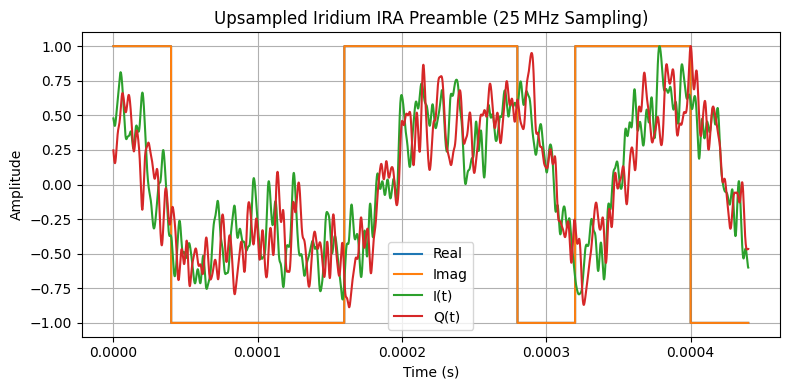

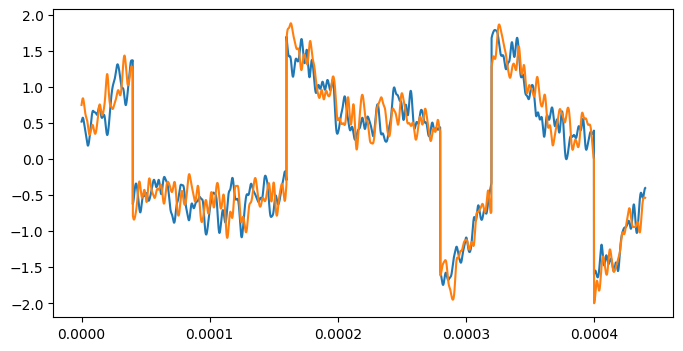

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
symbol_rate = 25e3        # 25 ksps
oversampling = 1000       # samples per symbol
fs = symbol_rate * oversampling  # 25e6 Hz

def iridium_ira_preamble():
    """
    Generate the 12‑symbol BPSK preamble (Unique Word) used in Iridium IRA messages.
    """
    s1 = -1 - 1j        # symbol “1”
    s0 = -s1            # symbol “0” → +1 + 1j
    # Correct 12‑bit pattern:
    bits = [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    return np.array([s0 if b == 0 else s1 for b in bits], dtype=np.complex64)

# Generate and upsample
preamble = iridium_ira_preamble()
samples_per_symbol = int(fs / symbol_rate)  # should be 1000
upsampled = np.repeat(preamble, samples_per_symbol)

# Time axis for upsampled signal
t = np.arange(len(upsampled)) / fs
print(len(upsampled))

# Plot real & imaginary parts vs. time
plt.figure(figsize=(8, 4))
plt.plot(t, np.real(upsampled), label='Real')
plt.plot(t, np.imag(upsampled), label='Imag')
plt.plot(t, I/max(I), label='I(t)')
plt.plot(t, Q/max(Q), label='Q(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Upsampled Iridium IRA Preamble (25 MHz Sampling)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plt.plot(t, np.real(upsampled)-I/max(I), label='Real')
plt.plot(t, np.imag(upsampled)-Q/max(Q), label='Imag')
plt.show()


## Flicker Noise

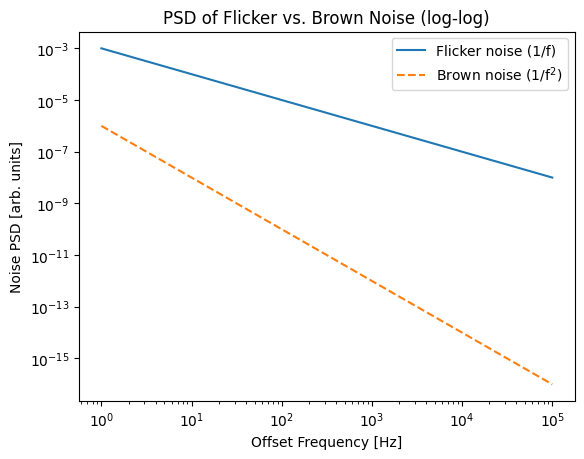

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency axis (offset frequency in Hz)
f = np.logspace(0, 5, num=200)  # 1 Hz to 100 kHz

# Define PSD for flicker and brown noise (arbitrary units)
S_flicker = 1e-3 / f        # 1/f spectrum
S_brown   = 1e-6 / (f**2)   # 1/f^2 spectrum

plt.loglog(f, S_flicker, label='Flicker noise (1/f)')
plt.loglog(f, S_brown,   label='Brown noise (1/f$^2$)', linestyle='--')
plt.xlabel("Offset Frequency [Hz]")
plt.ylabel("Noise PSD [arb. units]")
plt.title("PSD of Flicker vs. Brown Noise (log-log)")
plt.legend()
plt.show()

Phase Noise Variance: 1.9417601


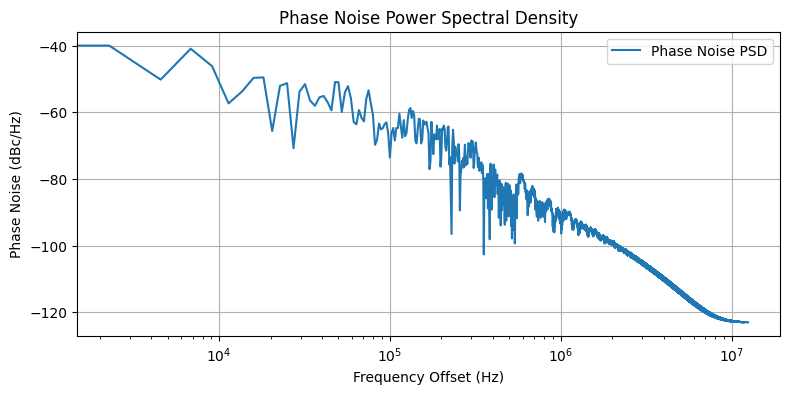

In [5]:
import numpy as np
from scipy.signal import welch, detrend
import matplotlib.pyplot as plt

def compute_phase_noise_features(iq_signal, fs):
    """
    Compute phase noise features from an IQ signal.
    
    Parameters:
      iq_signal : np.ndarray
          Array of shape (N, 2) where iq_signal[:, 0] is the I-component
          and iq_signal[:, 1] is the Q-component.
      fs : float
          Sample frequency in Hz.
    
    Returns:
      phase_noise_variance : float
          Variance of the detrended instantaneous phase (a scalar feature).
      f : np.ndarray
          Frequency bins (offset frequencies) for the PSD.
      phase_noise_dBc : np.ndarray
          Phase noise PSD values in dBc/Hz.
    """
    # Extract I and Q channels
    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    
    # Compute the instantaneous phase (in radians)
    phase = np.angle(I + 1j * Q)
    #plt.figure(figsize=(8, 4))
    #plt.plot(phase, label="Phase detrended")
    #plt.show()
    
    # Unwrap phase to remove discontinuities at ±π
    phase_unwrapped = np.unwrap(phase)

    #plt.figure(figsize=(8, 4))
    #plt.plot(phase_unwrapped, label="Phase detrended")
    #plt.show()
    
    # Remove linear trend (e.g., due to a constant carrier frequency offset)
    phase_detrended = detrend(phase_unwrapped)


    #plt.figure(figsize=(8, 4))
    #plt.plot(phase_detrended, label="Phase detrended")
    #plt.show()
    

    # Compute a scalar feature: the variance of the phase noise (related to phase jitter)
    phase_noise_variance = np.var(phase_detrended)
    
    # Compute the power spectral density (PSD) of the phase noise using Welch's method
    # Adjust 'nperseg' as needed based on the signal length
    f, Pxx = welch(phase_detrended, fs, nperseg=len(phase_detrended))
    
    # Convert the PSD to dBc/Hz.
    # (Note: The factor of 2 in the conversion depends on convention; here we assume the carrier is normalized.)
    # Adding a small epsilon avoids log(0).
    epsilon = 1e-12
    phase_noise_dBc = 10 * np.log10((Pxx + epsilon)/2)
    
    return phase_noise_variance, f, phase_noise_dBc

# Example usage:
if __name__ == '__main__':
    fs = 25e6  # Sample frequency: 25 MHz
    N = 11000  # Total number of samples
    t = np.arange(N) / fs

    # For demonstration, create a carrier with frequency fc and add some phase noise.
    fc = 1e6  # 1 MHz carrier frequency (example)
    clean_phase = 2 * np.pi * fc * t

    # Generate random phase noise (white Gaussian noise in radians)
    noise_std = 0.1  # Standard deviation of phase noise (radians)
    phase_noise = np.random.normal(0, noise_std, size=t.shape)

    # Total instantaneous phase = carrier + phase noise
    noisy_phase = clean_phase + phase_noise

    # Create the IQ signal (assuming ideal amplitude)
    #I_signal = np.cos(noisy_phase)
    #Q_signal = np.sin(noisy_phase)
    #I_signal = np.cos(clean_phase)
    #Q_signal = np.sin(clean_phase)
    I_signal = i_signal
    Q_signal = q_signal
    iq_signal = np.column_stack((I_signal, Q_signal))

    # Compute phase noise features
    pn_variance, f_bins, pn_psd_dBc = compute_phase_noise_features(iq_signal, fs)
    print("Phase Noise Variance:", pn_variance)

    # Plot the phase noise PSD
    plt.figure(figsize=(8, 4))
    plt.plot(f_bins, pn_psd_dBc, label="Phase Noise PSD")
    plt.xlabel("Frequency Offset (Hz)")
    plt.ylabel("Phase Noise (dBc/Hz)")
    plt.title("Phase Noise Power Spectral Density")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.semilogx() 
    #plt.xlim(left=1e0)
    #plt.xscale('symlog', linthreshx=1) 
    plt.show()

Phase Noise Variance: 1.9417601
Flicker slope ≃ -1.27, K1 ≃ 8.13e-02
Brown   slope ≃ -3.79, K2 ≃ 1.31e+01
Estimated corner freq: 161.2 Hz


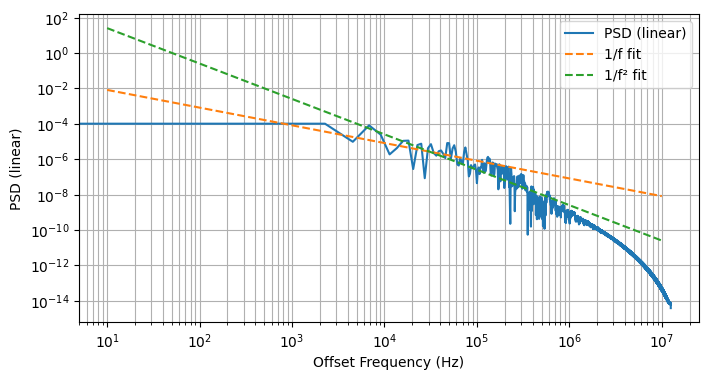

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, detrend

def fit_power_law(f, S):
    """
    Fit a power law S = K * f^a to data in log–log domain.
    Returns slope a and coefficient K.
    """
    logf = np.log10(f)
    logS = np.log10(S)
    slope, intercept = np.polyfit(logf, logS, 1)
    #K = 10**intercept
    K = intercept
    
    return slope, K

def compute_phase_noise_features(iq_signal, fs):
    """
    Compute phase noise PSD and scalar variance feature.
    """
    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    phase = np.unwrap(np.angle(I + 1j*Q))
    phase_detrended = detrend(phase)
    pn_variance = np.var(phase_detrended)
    f, Pxx = welch(phase_detrended, fs, nperseg=len(phase_detrended))
    # convert to linear PSD (unitless ratio, not dBc)
    Pxx_lin = Pxx / 2
    # convert to dBc/Hz for plotting
    epsilon = 1e-20
    pn_psd_dBc = 10 * np.log10(Pxx_lin + epsilon)
    return pn_variance, f, pn_psd_dBc, Pxx_lin

def extract_flicker_brown(f, Pxx_lin, flicker_band, brown_band):
    """
    Given frequency bins and linear PSD,
    fit 1/f and 1/f^2 regions defined by boolean masks.
    Returns flicker slope, K1, brown slope, K2, and corner frequency.
    """
    # Fit flicker
    a1, K1 = fit_power_law(f[flicker_band], Pxx_lin[flicker_band])
    # Fit brown
    a2, K2 = fit_power_law(f[brown_band], Pxx_lin[brown_band])
    # estimate corner frequency where K1/f = K2/f^2 => f_c = K2/K1
    f_corner = K2 / K1
    return {'flicker_slope': a1, 'K1': K1,
            'brown_slope': a2, 'K2': K2,
            'corner_freq': f_corner}

# Example usage with synthetic data
if __name__ == '__main__':

    I_signal = i_signal
    Q_signal = q_signal
    iq_signal = np.column_stack((I_signal, Q_signal))

    # Compute PSD
    pn_var, f_bins, pn_psd_dBc, Pxx_lin = compute_phase_noise_features(iq_signal, fs)

    # Define fitting bands (Hz)
    flicker_band = (f_bins >= 1e4) & (f_bins <= 1e5)
    brown_band   = (f_bins >= 1e5) & (f_bins <= 5e5)

    features = extract_flicker_brown(f_bins, Pxx_lin, flicker_band, brown_band)
    print("Phase Noise Variance:", pn_var)
    print(f"Flicker slope ≃ {features['flicker_slope']:.2f}, K1 ≃ {features['K1']:.2e}")
    print(f"Brown   slope ≃ {features['brown_slope']:.2f}, K2 ≃ {features['K2']:.2e}")
    print(f"Estimated corner freq: {features['corner_freq']:.1f} Hz")

    # Plot
    plt.figure(figsize=(8, 4))
    plt.loglog(f_bins, Pxx_lin, label='PSD (linear)')
    # overlay fits
    ff = np.logspace(1, 7, 50)
    plt.loglog(ff, features['K1']/ff**1, '--', label='1/f fit')
    gg = np.logspace(1, 7, 50)
    plt.loglog(gg, (2500 + features['K2'])/gg**2, '--', label='1/f² fit')
    plt.xlabel('Offset Frequency (Hz)')
    plt.ylabel('PSD (linear)')
    plt.legend()
    plt.grid(True, which='both')
    plt.show()


Phase Noise Variance : 1.9418e+00
Flicker slope         : -14.62
K1 (1/f coeff)        : 1.00e+00
Brown slope           : -2.47
K2 (1/f² coeff)       : 1.00e+00
Estimated corner freq : 1.0 Hz
flicker_band          : [False False False ... False False False] Hz
brown_band            : [False False False ... False False False] Hz


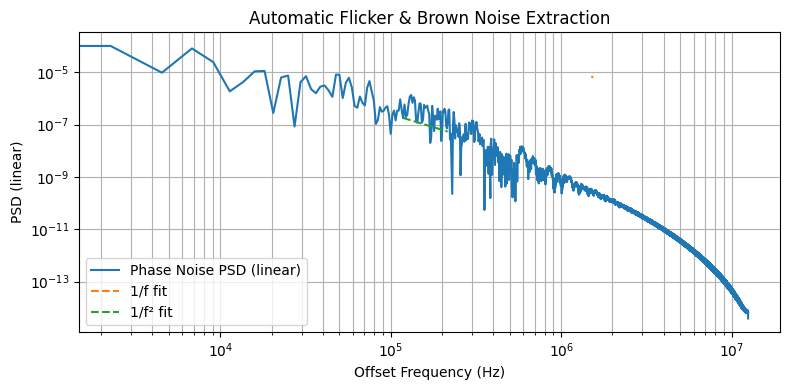

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, detrend

def safe_fit_power_law(f, S, min_points=10):
    """
    Fit S = K * f^a via log–log polyfit, but only if enough points and
    data are positive. Returns (slope, K) or (None, None) on failure.
    """
    mask = (f > 0) & (S > 0)
    if np.count_nonzero(mask) < min_points:
        return None, None
    eps = 1e-30
    logf = np.log10(f[mask])
    logS = np.log10(S[mask] + eps)
    try:
        slope, intercept = np.polyfit(logf, logS, 1)
        return slope, 1**intercept
    except np.linalg.LinAlgError:
        return None, None

def find_largest_contiguous_run(mask):
    """
    From a boolean mask, find the longest contiguous True segment.
    Returns a mask of the same length with only that segment True.
    """
    max_len = 0
    max_start = 0
    current_start = None

    for i, val in enumerate(mask):
        if val and current_start is None:
            current_start = i
        elif not val and current_start is not None:
            length = i - current_start
            if length > max_len:
                max_len, max_start = length, current_start
            current_start = None

    if current_start is not None:
        length = len(mask) - current_start
        if length > max_len:
            max_len, max_start = length, current_start

    out = np.zeros_like(mask, dtype=bool)
    if max_len >= 5:
        out[max_start:max_start + max_len] = True
    return out

def auto_detect_noise_bands(f, Pxx_lin, win_size=100, tol=0.5):
    """
    Automatically detect flicker (1/f) and brown (1/f^2) noise bands by
    computing local log–log slopes over a sliding window.
    Returns two boolean masks for flicker and brown regions.
    """
    n = len(f)
    half = win_size // 2
    slopes = np.full(n, np.nan)

    for i in range(half, n - half):
        fi = f[i - half : i + half]
        Si = Pxx_lin[i - half : i + half]
        slope, _ = safe_fit_power_law(fi, Si, min_points=win_size // 2)
        slopes[i] = slope

    flicker_mask = np.abs(slopes + 1) < tol
    brown_mask   = np.abs(slopes + 2) < tol

    flicker_band = find_largest_contiguous_run(flicker_mask)
    brown_band   = find_largest_contiguous_run(brown_mask)

    # Fallback if no valid band found
    if not flicker_band.any():
        mid = n // 2
        flicker_band[mid - half : mid + half] = True
    if not brown_band.any():
        brown_band[-2*half : -half] = True

    return flicker_band, brown_band

def extract_flicker_brown_auto(f, Pxx_lin):
    """
    Automatically detect bands and fit flicker/brown noise.
    Returns a dict with slopes, coefficients, bands, and corner frequency.
    """
    flicker_band, brown_band = auto_detect_noise_bands(f, Pxx_lin)
    a1, K1 = safe_fit_power_law(f[flicker_band], Pxx_lin[flicker_band])
    a2, K2 = safe_fit_power_law(f[brown_band],   Pxx_lin[brown_band])

    # Defaults if fits fail
    if a1 is None: a1, K1 = -1.0, np.nan
    if a2 is None: a2, K2 = -2.0, np.nan

    f_corner = (K2 / K1) if (K1 and K2) else np.nan

    return {
        'flicker_slope': a1,
        'K1':             K1,
        'flicker_band':  flicker_band,
        'brown_slope':   a2,
        'K2':             K2,
        'brown_band':    brown_band,
        'corner_freq':   f_corner
    }

def compute_phase_noise_features(iq_signal, fs):
    """
    Compute the phase noise PSD and phase-variance feature from an IQ signal.
    Returns:
      - phase_noise_variance: scalar variance of detrended phase
      - f: offset frequency bins (Hz)
      - Pxx_lin: linear PSD of phase noise
    """
    I = iq_signal[:, 0]
    Q = iq_signal[:, 1]
    phase = np.unwrap(np.angle(I + 1j * Q))
    phase_detrended = detrend(phase)
    phase_noise_variance = np.var(phase_detrended)

    # Welch PSD
    f, Pxx = welch(phase_detrended, fs, nperseg=len(phase_detrended))
    Pxx_lin = Pxx / 2  # adjust convention

    return phase_noise_variance, f, Pxx_lin

if __name__ == '__main__':
    I_signal = i_signal
    Q_signal = q_signal
    iq_signal = np.column_stack((I_signal, Q_signal))

    # Compute features
    pn_var, f_bins, Pxx_lin = compute_phase_noise_features(iq_signal, fs)
    features = extract_flicker_brown_auto(f_bins, Pxx_lin)

    # Display results
    print(f"Phase Noise Variance : {pn_var:.4e}")
    print(f"Flicker slope         : {features['flicker_slope']:.2f}")
    print(f"K1 (1/f coeff)        : {features['K1']:.2e}")
    print(f"Brown slope           : {features['brown_slope']:.2f}")
    print(f"K2 (1/f² coeff)       : {features['K2']:.2e}")
    print(f"Estimated corner freq : {features['corner_freq']:.1f} Hz")
    print(f"flicker_band          : {features['flicker_band']} Hz")
    print(f"brown_band            : {features['brown_band']} Hz")

    # Plot PSD and fits
    plt.figure(figsize=(8, 4))
    plt.loglog(f_bins, Pxx_lin, label='Phase Noise PSD (linear)')
    fb = f_bins[features['flicker_band']]
    plt.loglog(fb, (10*features['K1']/fb**1),  '--', label='1/f fit')
    bb = f_bins[features['brown_band']]
    plt.loglog(bb, (2500 + features['K2'])/bb**2, '--', label='1/f² fit')
    plt.xlabel('Offset Frequency (Hz)')
    plt.ylabel('PSD (linear)')
    plt.title('Automatic Flicker & Brown Noise Extraction')
    plt.grid(True, which='both')
    plt.legend()
    plt.tight_layout()
    plt.show()


Robustness Test for Automatic Flicker/Brown Noise Extraction
Test 1: K1=3.17e-14, K2=7.47e-21
  Flicker slope err = 1.00e+00, K1 rel err = 3.06e+01
  Brown slope err   = 2.00e+00, K2 rel err = 1.34e+08
-----------------------------------------------------------------
Test 2: K1=4.40e-11, K2=3.31e-20
  Flicker slope err = 1.00e+00, K1 rel err = -9.77e-01
  Brown slope err   = 2.00e+00, K2 rel err = 3.02e+07
-----------------------------------------------------------------
Test 3: K1=3.06e-19, K2=1.44e-19
  Flicker slope err = 1.00e+00, K1 rel err = 3.27e+06
  Brown slope err   = 2.00e+00, K2 rel err = 6.96e+06
-----------------------------------------------------------------
Test 4: K1=1.75e-13, K2=6.02e-28
  Flicker slope err = 1.00e+00, K1 rel err = 4.71e+00
  Brown slope err   = 2.00e+00, K2 rel err = 1.66e+15
-----------------------------------------------------------------
Test 5: K1=2.16e-11, K2=8.45e-24
  Flicker slope err = 1.00e+00, K1 rel err = -9.53e-01
  Brown slope err   = 

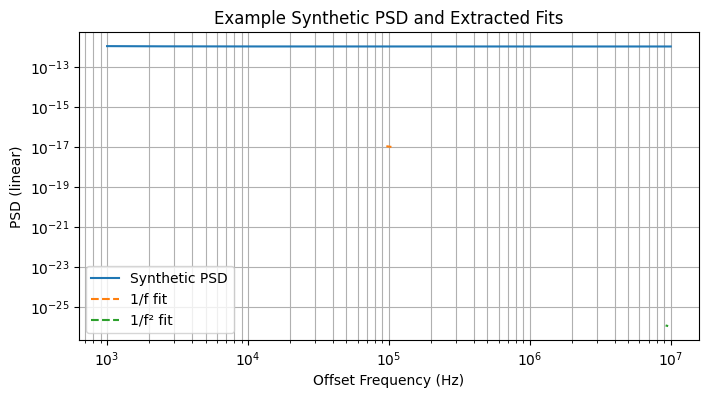

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- BEGIN FUNCTION DEFINITIONS ---

def safe_fit_power_law(f, S, min_points=10):
    mask = (f > 0) & (S > 0)
    if np.count_nonzero(mask) < min_points:
        return None, None
    eps = 1e-30
    logf = np.log10(f[mask])
    logS = np.log10(S[mask] + eps)
    try:
        slope, intercept = np.polyfit(logf, logS, 1)
        return slope, 10**intercept
    except np.linalg.LinAlgError:
        return None, None

def find_largest_contiguous_run(mask):
    max_len = 0
    max_start = 0
    current_start = None
    for i, val in enumerate(mask):
        if val and current_start is None:
            current_start = i
        elif not val and current_start is not None:
            length = i - current_start
            if length > max_len:
                max_len, max_start = length, current_start
            current_start = None
    if current_start is not None:
        length = len(mask) - current_start
        if length > max_len:
            max_len, max_start = length, current_start
    out = np.zeros_like(mask, dtype=bool)
    if max_len >= 5:
        out[max_start:max_start + max_len] = True
    return out

def auto_detect_noise_bands(f, Pxx_lin, win_size=101, tol=0.5):
    n = len(f)
    half = win_size // 2
    slopes = np.full(n, np.nan)
    for i in range(half, n - half):
        fi = f[i - half : i + half]
        Si = Pxx_lin[i - half : i + half]
        slope, _ = safe_fit_power_law(fi, Si, min_points=win_size // 2)
        slopes[i] = slope
    flicker_mask = np.abs(slopes + 1) < tol
    brown_mask   = np.abs(slopes + 2) < tol
    flicker_band = find_largest_contiguous_run(flicker_mask)
    brown_band   = find_largest_contiguous_run(brown_mask)
    if not flicker_band.any():
        mid = n // 2
        flicker_band[mid - half : mid + half] = True
    if not brown_band.any():
        brown_band[-2*half : -half] = True
    return flicker_band, brown_band

def extract_flicker_brown_auto(f, Pxx_lin):
    flicker_band, brown_band = auto_detect_noise_bands(f, Pxx_lin)
    a1, K1 = safe_fit_power_law(f[flicker_band], Pxx_lin[flicker_band])
    a2, K2 = safe_fit_power_law(f[brown_band],   Pxx_lin[brown_band])
    if a1 is None: a1, K1 = -1.0, np.nan
    if a2 is None: a2, K2 = -2.0, np.nan
    f_corner = (K2 / K1) if (K1 and K2) else np.nan
    return {
        'flicker_slope': a1, 'K1': K1, 'flicker_band': flicker_band,
        'brown_slope':   a2, 'K2': K2, 'brown_band':   brown_band,
        'corner_freq':   f_corner
    }

# --- END FUNCTION DEFINITIONS ---

def generate_synthetic_psd(f, K1, K2, white_level=1e-12):
    return K1 / f + K2 / f**2 + white_level

def robust_test(num_tests=5, freq_range=(1e3, 1e7), points=11000):
    print("Robustness Test for Automatic Flicker/Brown Noise Extraction")
    print("="*65)
    results = []
    f = np.logspace(np.log10(freq_range[0]), np.log10(freq_range[1]), points)
    
    for i in range(num_tests):
        K1 = 10**np.random.uniform(-20, -10)
        K2 = 10**np.random.uniform(-30, -15)
        Pxx_lin = generate_synthetic_psd(f, K1, K2)
        feats = extract_flicker_brown_auto(f, Pxx_lin)
        
        err_slope1 = feats['flicker_slope'] + 1
        err_slope2 = feats['brown_slope'] + 2
        err_K1     = (feats['K1'] - K1)/K1 if not np.isnan(feats['K1']) else np.nan
        err_K2     = (feats['K2'] - K2)/K2 if not np.isnan(feats['K2']) else np.nan
        
        print(f"Test {i+1}: K1={K1:.2e}, K2={K2:.2e}")
        print(f"  Flicker slope err = {err_slope1:.2e}, K1 rel err = {err_K1:.2e}")
        print(f"  Brown slope err   = {err_slope2:.2e}, K2 rel err = {err_K2:.2e}")
        print("-"*65)
    
    # Visualize one example
    example = 0
    K1_ex = 10**np.random.uniform(-20, -10)
    K2_ex = 10**np.random.uniform(-30, -15)
    Pxx_ex = generate_synthetic_psd(f, K1_ex, K2_ex)
    feats_ex = extract_flicker_brown_auto(f, Pxx_ex)
    
    plt.figure(figsize=(8,4))
    plt.loglog(f, Pxx_ex, label='Synthetic PSD')
    fb = f[feats_ex['flicker_band']]
    bb = f[feats_ex['brown_band']]
    plt.loglog(fb, feats_ex['K1']/fb, '--', label='1/f fit')
    plt.loglog(bb, feats_ex['K2']/bb**2, '--', label='1/f² fit')
    plt.title('Example Synthetic PSD and Extracted Fits')
    plt.xlabel('Offset Frequency (Hz)')
    plt.ylabel('PSD (linear)')
    plt.legend()
    plt.grid(True, which='both')
    plt.show()

# Run the robust test
robust_test(10)